# Using anemoi datasets

In the previous notebook, we have focused on the creation of the datasets, and only briefly mention how to interact with them. We will do that in this notebook. To have a more in-depth overview, see the section on [using an existing dataset](https://anemoi.readthedocs.io/projects/datasets/en/latest/datasets/using/introduction.html) in the `anemoi-datasets` documentation.

Warning: `anemoi-datasets` is very young software. As such, the pace of development is high and the things shown here could not be up-to-date.

In [39]:
from pathlib import Path
from anemoi.datasets import open_dataset
import yaml
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

ROOT_DIR = Path.cwd().parent
DATASET_DIR = ROOT_DIR / "output" / "datasets"
DEMO_S3_URL = "https://object-store.os-api.cci1.ecmwf.int/ml-tests/test-data/samples/demo/"

## Opening a dataset (is more than just opening)
Anemoi datasets can be opened using `open_dataset`. This function is at the core of `anemoi-datasets`: from it, you can open datasets in many different ways, by specifying several composable transformations. We will see some of them in this notebook.

Let's start by opening a single dataset and inspect the main methods and attributes available on the object `Dataset` object (uncomment as you go):

In [2]:
dataset = str(DATASET_DIR / "aifs-ea-an-oper-0001-mars-o96-1979-2022-6h-v6.zarr")
ds = open_dataset(dataset)
ds.tree()

Zarr
  path: /scratch/mch/fzanetta/projects/anemoi-demo-keisler2022/output/datasets/aifs-ea-an-oper-0001-mars-o96-1979-2022-6h-v6.zarr

In [3]:
print(f"Shape: {ds.shape}\n")
print(f"Frequency: {ds.frequency}\n")
print(f"Variables: {ds.variables}\n")
print(f"Dates: {ds.dates}\n")
print(f"Latitudes: {ds.latitudes}\n")
print(f"Longitudes: {ds.longitudes}\n")

Shape: (64284, 101, 1, 40320)

Frequency: 6:00:00

Variables: ['q_50', 'q_100', 'q_150', 'q_200', 'q_250', 'q_300', 'q_400', 'q_500', 'q_600', 'q_700', 'q_850', 'q_925', 'q_1000', 't_50', 't_100', 't_150', 't_200', 't_250', 't_300', 't_400', 't_500', 't_600', 't_700', 't_850', 't_925', 't_1000', 'u_50', 'u_100', 'u_150', 'u_200', 'u_250', 'u_300', 'u_400', 'u_500', 'u_600', 'u_700', 'u_850', 'u_925', 'u_1000', 'v_50', 'v_100', 'v_150', 'v_200', 'v_250', 'v_300', 'v_400', 'v_500', 'v_600', 'v_700', 'v_850', 'v_925', 'v_1000', 'w_50', 'w_100', 'w_150', 'w_200', 'w_250', 'w_300', 'w_400', 'w_500', 'w_600', 'w_700', 'w_850', 'w_925', 'w_1000', 'z_50', 'z_100', 'z_150', 'z_200', 'z_250', 'z_300', 'z_400', 'z_500', 'z_600', 'z_700', 'z_850', 'z_925', 'z_1000', '10u', '10v', '2d', '2t', 'lsm', 'msl', 'sdor', 'skt', 'slor', 'sp', 'tcw', 'z', 'cp', 'tp', 'cos_latitude', 'cos_longitude', 'sin_latitude', 'sin_longitude', 'cos_julian_day', 'cos_local_time', 'sin_julian_day', 'sin_local_time', 'ins

In [4]:
print(ds.metadata())

{'version': '0.5.27', 'arguments': {'args': ['/scratch/mch/fzanetta/projects/anemoi-demo-keisler2022/output/datasets/aifs-ea-an-oper-0001-mars-o96-1979-2022-6h-v6.zarr'], 'kwargs': {}}, 'specific': {'action': 'zarr', 'variables': ['q_50', 'q_100', 'q_150', 'q_200', 'q_250', 'q_300', 'q_400', 'q_500', 'q_600', 'q_700', 'q_850', 'q_925', 'q_1000', 't_50', 't_100', 't_150', 't_200', 't_250', 't_300', 't_400', 't_500', 't_600', 't_700', 't_850', 't_925', 't_1000', 'u_50', 'u_100', 'u_150', 'u_200', 'u_250', 'u_300', 'u_400', 'u_500', 'u_600', 'u_700', 'u_850', 'u_925', 'u_1000', 'v_50', 'v_100', 'v_150', 'v_200', 'v_250', 'v_300', 'v_400', 'v_500', 'v_600', 'v_700', 'v_850', 'v_925', 'v_1000', 'w_50', 'w_100', 'w_150', 'w_200', 'w_250', 'w_300', 'w_400', 'w_500', 'w_600', 'w_700', 'w_850', 'w_925', 'w_1000', 'z_50', 'z_100', 'z_150', 'z_200', 'z_250', 'z_300', 'z_400', 'z_500', 'z_600', 'z_700', 'z_850', 'z_925', 'z_1000', '10u', '10v', '2d', '2t', 'lsm', 'msl', 'sdor', 'skt', 'slor', 'sp'

### Subsetting

All time-selections are considered "Subset" operations.

In [5]:
ds = open_dataset(dataset, start="2020-01-01", end="2020-01-30", frequency="6h")
print(ds.tree())

Subset
  frequency: 6h
  start: 2020-01-01
  end: 2020-01-30
  Zarr
    path: /scratch/mch/fzanetta/projects/anemoi-demo-keisler2022/output/datasets/aifs-ea-an-oper-0001-mars-o96-1979-2022-6h-v6.zarr


That was quick. An important concept to understand about `anemoi-datasets` is that all the operations involved in the opening of a dataset are _lazy_: they are not evaluated until you want to access the underlying data, as you would do with a `zarr` archive. Yet, all the relevant properties such as the shape are already modified accordingly.

In [6]:
# the dataset is still lazy loaded here
print(ds.shape)

(120, 101, 1, 40320)


In [7]:
# now we actually access the data
print(ds[:].shape)

(120, 101, 1, 40320)


In [8]:
# note: we can also declarativeely open datasets using a config...imagine this is a YAML file
DATASET_YAML_CONFIG = f"""
dataset: {DATASET_DIR / "aifs-ea-an-oper-0001-mars-o96-1979-2022-6h-v6.zarr"}
start: 2020-01-01
end: 2020-01-30
frequency: 6h
"""

print(DATASET_YAML_CONFIG)
print("-"*50 + "\n")

dataset_config = yaml.safe_load(DATASET_YAML_CONFIG)
ds = open_dataset(dataset_config)
print(ds.tree())


dataset: /scratch/mch/fzanetta/projects/anemoi-demo-keisler2022/output/datasets/aifs-ea-an-oper-0001-mars-o96-1979-2022-6h-v6.zarr
start: 2020-01-01
end: 2020-01-30
frequency: 6h

--------------------------------------------------

Subset
  frequency: 6h
  start: 2020-01-01
  end: 2020-01-30
  Zarr
    path: /scratch/mch/fzanetta/projects/anemoi-demo-keisler2022/output/datasets/aifs-ea-an-oper-0001-mars-o96-1979-2022-6h-v6.zarr


## Combining

With `open_dataset`, you can also combine multiple datasets in a flexible way. At the end, you will get an object that acts as a single dataset, and all the combining operations are abstracted away. For more information, check out https://anemoi.readthedocs.io/projects/datasets/en/latest/using/combining.html. 

Let's see some valid examples:

In [ ]:
# TODO: use demo S3 bucket when ready
TMP_DATA_DIR = Path("/scratch/mch/fzanetta/data/realch1-anemoi-test/")

# example 1
ds_ml = open_dataset(TMP_DATA_DIR / "realch1-1km-1h-ml.zarr")
ds_sfc = open_dataset(TMP_DATA_DIR / "realch1-1km-1h-sfc.zarr")
ds = open_dataset(ds_sfc, ds_ml)

# example 2 (note how we can mix an opened dataset object with a dict config)
ds = open_dataset(TMP_DATA_DIR / "realch1-1km-1h-sfc.zarr", start="2023-01-15", end="2023-01-18", frequency="6h")
other = {
    "dataset": TMP_DATA_DIR / "realch1-1km-1h-ml.zarr",
    "start": "2023-01-15",
    "end": "2023-01-18",
    "frequency": "6h",
}
ds = open_dataset(ds, other)

print(ds.tree())



One of the datasets has no resolution, cannot check compatibility
One of the datasets has no resolution, cannot check compatibility


Select
  overlay: cos_julian_day, cos_latitude,...
  Join
    Subset
      frequency: 6h
      start: 2023-01-15
      end: 2023-01-18
      Zarr
        path: /scratch/mch/fzanetta/data/realch1-anemoi-test/realch1-1km-1h-sfc.zarr
    Subset
      frequency: 6h
      start: 2023-01-15
      end: 2023-01-18
      Zarr
        path: /scratch/mch/fzanetta/data/realch1-anemoi-test/realch1-1km-1h-ml.zarr


### Combining datasets for stretched grid modelling

It is possible to combine a regional and a global dataset using a cutout operation.

In [15]:
dataset_config = {
    "cutout": [
        {"dataset": DATASET_DIR / "mch-co2-an-archive-0p02-2015-2020-6h-v3-pl13.zarr", "thinning": 2},
        DATASET_DIR / "aifs-ea-an-oper-0001-mars-o96-1979-2022-6h-v6.zarr",
        # "https://object-store.os-api.cci1.ecmwf.int/ml-tests/test-data/samples/anemoi-integration-tests/training/datasets/aifs-ea-an-oper-0001-mars-o48-1979-19-6h-v6-testset.zarr"
    ],
    "adjust": "all", # this automatically takes intersection of variables and dates
}

ds = open_dataset(dataset_config)
ds.tree()

Cutout
  Select
    select: 10u, 10v, 2d, 2t, cos_julian_day,...
    Thinning
      thinning: 2
      method: every-nth
      Zarr
        path: /scratch/mch/fzanetta/projects/anemoi-demo-keisler2022/output/datasets/mch-co2-an-archive-0p02-2015-2020-6h-v3-pl13.zarr
  Select
    select: 10u, 10v, 2d, 2t, cos_julian_day,...
    Subset
      start: 2015-11-29 00:00:00
      end: 2015-11-29 06:00:00
      Zarr
        path: /scratch/mch/fzanetta/projects/anemoi-demo-keisler2022/output/datasets/aifs-ea-an-oper-0001-mars-o96-1979-2022-6h-v6.zarr

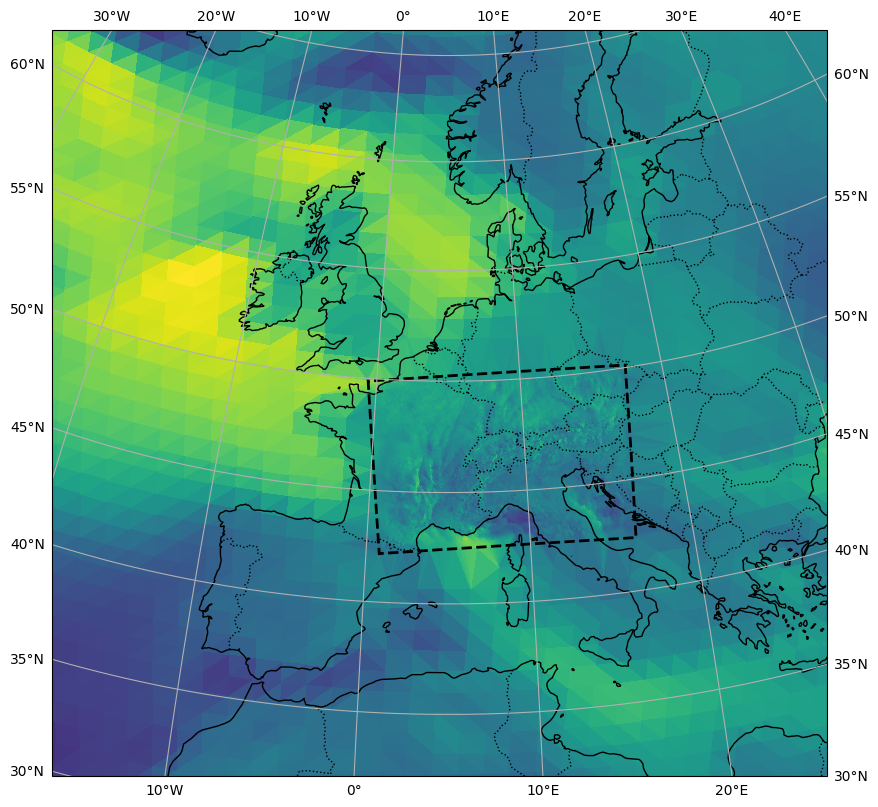

In [16]:
from matplotlib.tri import Triangulation
from shapely.geometry import MultiPoint
from shapely import concave_hull

def _ortographic_tri(lon, lat, proj) -> Triangulation:
    """Compute the triangulation for the orthographic projection."""
    x, y, _ = proj.transform_points(
        ccrs.PlateCarree(), lon, lat
    ).T
    mask = ~(np.isnan(x) | np.isnan(y))
    return Triangulation(x[mask], y[mask]), mask

def _lam_polygon(lon: np.ndarray, lat: np.ndarray) -> MultiPoint:
    """Compute the concave hull of the LAM domain nodes."""
    points = MultiPoint(np.column_stack([lon, lat]))
    return concave_hull(points, 0.2)

def plot_lam_polygon(poly, ax, **kwargs):
    
    kwargs = {
        "facecolor": "none",
        "edgecolor": "red",
        "linewidth": 1,
        "linestyle": "--",
    } | kwargs

    patch = plt.Polygon(
        np.asarray(poly.exterior.coords.xy).T,
        **kwargs,
        transform=ccrs.PlateCarree()
    )
    ax.add_patch(patch)


proj = ccrs.Orthographic(central_longitude=5.0, central_latitude=45.0)
europe_bbox = [-16.0, 25.0, 30.0, 65.0]
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=proj)
ax.set_extent(europe_bbox, crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.gridlines(draw_labels=True)
# ax.scatter(ds.longitudes, ds.latitudes, transform=ccrs.PlateCarree(), s=1, color='red')
tri, mask = _ortographic_tri(ds.longitudes, ds.latitudes, proj)
ax.tripcolor(tri, ds[:][-1, ds.variables.index("10u"), 0, mask])

# add polygon of the LAM domain
max_lam_idx = ds.supporting_arrays()["lam_0/cutout_mask"].sum()
lam_poly = _lam_polygon(ds.longitudes[:max_lam_idx], ds.latitudes[:max_lam_idx])
plot_lam_polygon(lam_poly, ax, edgecolor='black', linewidth=2)
                    


In [48]:
from anemoi.datasets import open_dataset

# url = "https://object-store.os-api.cci1.ecmwf.int/ml-tests/test-data/samples/anemoi-integration-tests/training/datasets/aifs-ea-an-oper-0001-mars-o48-1979-19-6h-v6-testset.zarr"
# url = "https://object-store.os-api.cci1.ecmwf.int/ml-tests/test-data/samples/demo/datasets/keisler-era5-gs-weatherbench2-1p0d-1979-1979-3h-v0.zarr"
url = "https://object-store.os-api.cci1.ecmwf.int/ml-tests/test-data/samples/demo/datasets/aifs-ea-an-oper-0001-mars-o96-1979-19-6h-v6-testset.zarr"
# url = DEMO_S3_URL + "datasets/keisler-era5-gs-weatherbench2-1p0d-1979-1979-3h-v0.zarr"
# url = DEMO_S3_URL + "datasets/aifs-ea-an-oper-0001-mars-o96-1979-19-6h-v6-testset.zarr"
ds=open_dataset(url)

PathNotFoundError: nothing found at path 'https://object-store.os-api.cci1.ecmwf.int/ml-tests/test-data/samples/demo/datasets/aifs-ea-an-oper-0001-mars-o96-1979-19-6h-v6-testset.zarr'

In [16]:
# reshape last dimension into 2D grid
ds_reshaped = ds[0][ds.variables.index("temperature_850")].reshape(*ds.field_shape)

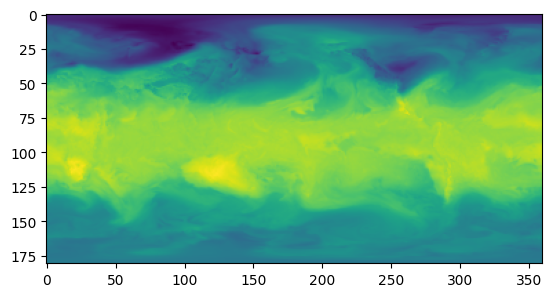

In [45]:
plt.imshow(ds_reshaped.T[::-1])

<GeoAxes: >

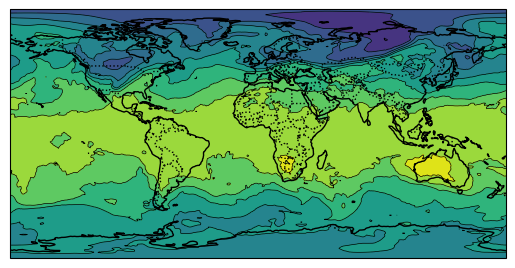

In [44]:
ds.plot(variable="temperature_850", date="1979-01-01T03:00", member=0)

In [46]:
ds.dates

array(['1979-01-01T00:00:00', '1979-01-01T03:00:00',
       '1979-01-01T06:00:00', '1979-01-01T09:00:00'],
      dtype='datetime64[s]')

In [63]:
ds[-1]

ValueError: need at least one array to concatenate

In [70]:
ds = open_dataset("/scratch/mch/fzanetta/data/anemoi/datasets/mch-co1e-an-archive-0p01-2019-2024-1h-v1-pl13.zarr")
stats = ds.statistics
min = stats["minimum"]
max = stats["maximum"]
vrange = max - min

# print(f"\n{'Variable':15} | {'Min':15} | {'Max':15} | {'Range':15} | {r'0.1% of Range':15}")
# for var in sorted(ds.variables):
#     var_idx = ds.variables.index(var)

#     print(f"{var:15} | {min[var_idx]:15.4f} | {max[var_idx]:15.4f} | {vrange[var_idx]:15.4f} | {0.001 * vrange[var_idx]:15.4f}")

# print(f"| {'Variable':<15} | {'Min':>15} | {'Max':>15} | {'Range':>15} | {'0.1% of Range':>15} |")
# print(f"| {'-':<15} | {'-':>15} | {'-':>15} | {'-':>15} | {'-':>15} |")
# for var in sorted(ds.variables):
#     var_idx = ds.variables.index(var)
#     print(f"| {var:<15} | {min[var_idx]:15.2f} | {max[var_idx]:15.2f} | {vrange[var_idx]:15.2f} | {0.001 * vrange[var_idx]:15.2f} |")

# without space padding or alignment, just plain markdown table
print(f"| Variable | Min | Max | Range | 0.1% of Range | 1% of Range |")
print(f"| - | - | - | - | - | - |")
for var in sorted(ds.variables):
    var_idx = ds.variables.index(var)
    is_small = vrange[var_idx] < 0.01
    is_very_small = vrange[var_idx] < 0.001
    print(f"| {var} | {min[var_idx]:.7f} | {max[var_idx]:.7f} | {vrange[var_idx]:.7f} | {0.001 * vrange[var_idx]:.7f} | {0.01 * vrange[var_idx]:.7f} |")

Dataset /scratch/mch/fzanetta/data/anemoi/datasets/mch-co1e-an-archive-0p01-2019-2024-1h-v1-pl13.zarr has missing dates


| Variable | Min | Max | Range | 0.1% of Range | 1% of Range |
| - | - | - | - | - | - |
| CLCH | 0.0000000 | 100.0000000 | 100.0000000 | 0.1000000 | 1.0000000 |
| CLCL | 0.0000000 | 100.0000000 | 100.0000000 | 0.1000000 | 1.0000000 |
| CLCM | 0.0000000 | 100.0000000 | 100.0000000 | 0.1000000 | 1.0000000 |
| CLCT | 0.0000000 | 100.0008240 | 100.0008240 | 0.1000008 | 1.0000082 |
| FIS | -348.6369629 | 41850.3632812 | 42199.0002441 | 42.1990002 | 421.9900024 |
| FI_100 | 150449.7343750 | 165173.7500000 | 14724.0156250 | 14.7240156 | 147.2401563 |
| FI_1000 | -2484.6782227 | 5535.2729492 | 8019.9511719 | 8.0199512 | 80.1995117 |
| FI_150 | 125971.1875000 | 141027.0937500 | 15055.9062500 | 15.0559062 | 150.5590625 |
| FI_200 | 108233.2500000 | 123798.7812500 | 15565.5312500 | 15.5655313 | 155.6553125 |
| FI_250 | 94344.9218750 | 108863.4062500 | 14518.4843750 | 14.5184844 | 145.1848437 |
| FI_300 | 82913.7343750 | 96122.8359375 | 13209.1015625 | 13.2091016 | 132.0910156 |
| FI_400 | 64715.